In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Visualization/docs_nums.csv")

In [ ]:
df

,Unnamed: 0,filename,text,type
0,0,docsumo_data_182.jpg,990 Return of Organization Exempt From Income ...,Form 990
1,1,docsumo_data_120.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord
2,2,docsumo_data_108.jpg,Department of the Treasury- -Internal Revenue ...,Form 1040
3,3,docsumo_data_124.jpg,Department of the Treasury- -Internal Revenue ...,Form 1040
4,4,docsumo_data_56.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord
...,...,...,...,...
180,180,docsumo_data_8.jpg,990 Return of Organization Exempt From Income ...,Form 990
181,181,docsumo_data_174.jpg,Department of the Treasury- -Internal Revenue ...,Form 1040
182,182,docsumo_data_119.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord
183,183,docsumo_data_117.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord


In [ ]:
df_insurance = df[df["type"]=="acord"]

In [ ]:
words = df_insurance.iloc[0]["text"].split()

In [ ]:
def extractDates(words):
  for i in range(len(words)-1):
    pre = words[i]
    post = words[i+1]
    if len(pre)==4 and len(post) == 4:
      if pre.isdigit() and post.isdigit():
        break
  if pre.isdigit() and post.isdigit():
    return [pre, post]

In [ ]:
# effective_date, expiration_date

In [ ]:
dates = []

In [ ]:
for text in df_insurance["text"]:
  words = text.split()
  dates.append(extractDates(words))

In [ ]:
dates = [date for date in dates if date != None]

In [ ]:
len(dates)

45

In [ ]:
effective_date = [date[0] for date in dates]
expiration_date = [date[1] for date in dates]

In [ ]:
df_ins = pd.DataFrame({"effective": effective_date, "expiration": expiration_date})

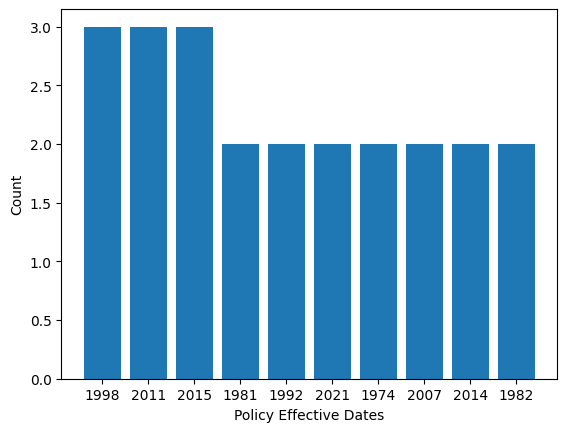

In [ ]:
value_counts = df_ins['effective'].value_counts()

top_values = value_counts.head(10)

plt.bar(top_values.index, top_values.values)
plt.xlabel("Policy Effective Dates")
plt.ylabel("Count")
plt.show()

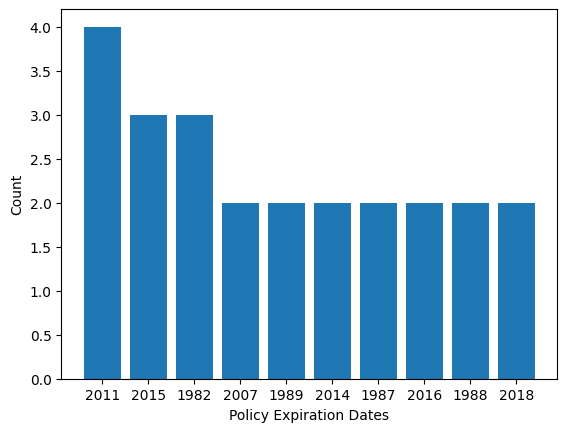

In [ ]:
value_counts = df_ins['expiration'].value_counts()

top_values = value_counts.head(10)

plt.bar(top_values.index, top_values.values)
plt.xlabel("Policy Expiration Dates")
plt.ylabel("Count")
plt.show()

In [ ]:
df_insurance['text'][1]

'DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERTY INSURANCE 2001 THIS CERTIFICATE IS ISSUED As MATTER OF INFORMATION ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE HOLDER THIS CERTIFICATE DOES NOT AFFIRMATIVELY OR NEGATIVELY AMEND, EXTEND OR ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW. THIS CERTIFICATE OF INSURANCE DOES NOT CONSTITUTE CONTRACT BETWEEN THE ISSUING INSURER(S), AUTHORIZED REPRESENTATIVE OR PRODUCER, AND THE CERTIFICATE HOLDER_ PRODUCER CONTACT NAME: Surveyor, mining PHON_Ext: 5572004901 FAc_No) 5056030058 774 Bailey Highway Suite 200 EDDREsS:_ http IInuvdjvtkhein Moralestown; AZ 08855 ERSDOCER I; East Kevinmouth Oregon 617741 INSURER(S)AFFORDING CQVERAGE NAIC # INSURED INSURERA: Stacy Rogers DVM 17798 Police officer INSURER B INSURER € 03918 Rivera Harbor Apt: 775 INSURER D INSURER E Melissaton Colorado 02197 INSURER F COVERAGES CERTIFICATE NUMBER: 119939462REVISION NUMBER: LOCATION OF PREMISES / DESCRIPTION OF PROPERTY (Attach ACORD 101, Additional Remarks Schedule

In [ ]:
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

def find_state(text):
    for state in us_states:
        if state.lower() in text.lower():
            return state
    return None

df_insurance['state'] = df_insurance['text'].apply(find_state)
df_insurance.head()


<ipython-input-136-b7a28fd4c6f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance['state'] = df_insurance['text'].apply(find_state)


,Unnamed: 0,filename,text,type,state
1,1,docsumo_data_120.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Colorado
4,4,docsumo_data_56.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Delaware
5,5,docsumo_data_154.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Hawaii
6,6,docsumo_data_81.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,New Mexico
10,10,docsumo_data_35.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Alaska


In [ ]:
df_insurance['state'].nunique()

25

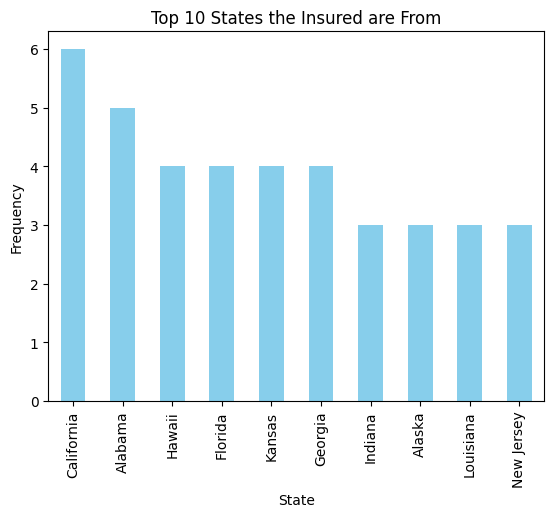

In [ ]:
top_states = df_insurance['state'].value_counts().nlargest(10)
top_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 States the Insured are From')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_insurance['insurer_name'] = df_insurance['text'].str.extract(r'INSURER[A-Z]?\s*:? (.+?)\d')
df_insurance.head()

<ipython-input-139-9582096b9266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance['insurer_name'] = df_insurance['text'].str.extract(r'INSURER[A-Z]?\s*:? (.+?)\d')


,Unnamed: 0,filename,text,type,state,insurer_name
1,1,docsumo_data_120.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Colorado,Stacy Rogers DVM
4,4,docsumo_data_56.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Delaware,Tracy_Cameron
5,5,docsumo_data_154.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Hawaii,A :_Doris Nelson
6,6,docsumo_data_81.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,New Mexico,"Jacqueline Martin Education officer , museuml ..."
10,10,docsumo_data_35.jpg,DATE (MMIDDIYYYY) ACORD CERTIFICATE OF PROPERT...,acord,Alaska,Jermaine Jennings]


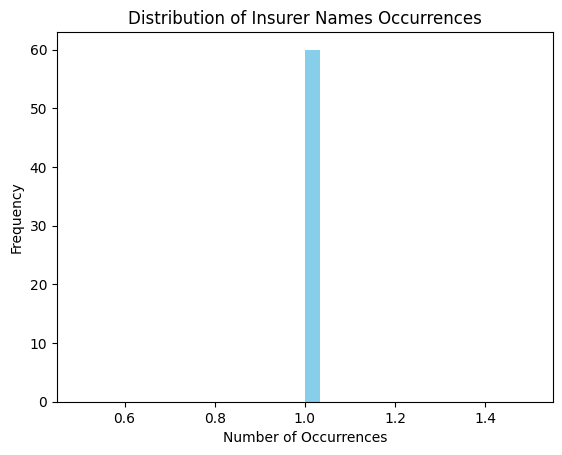

In [ ]:
plt.hist(df_insurance['insurer_name'].value_counts(), bins=30, color='skyblue')
plt.title('Distribution of Insurer Names Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.show()

**bo**

